<a href="https://colab.research.google.com/github/cho-jr/2020_cphys2/blob/master/hw_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashin MNIST 
### MNIST 패션 이미지를 CNN을 이용하여 분류하세요. CNN을 이용한 분류 결과를 MLP와 비교해보세요.

In [2]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

#### Multi-Layer Perceptron (MLP)

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
782/782 [==============================] - 17s 21ms/step - loss: 0.5668 - acc: 0.7960 - val_loss: 0.4161 - val_acc: 0.8443
Epoch 2/10
782/782 [==============================] - 17s 21ms/step - loss: 0.4013 - acc: 0.8565 - val_loss: 0.3722 - val_acc: 0.8601
Epoch 3/10
782/782 [==============================] - 17s 21ms/step - loss: 0.3587 - acc: 0.8710 - val_loss: 0.3968 - val_acc: 0.8470
Epoch 4/10
782/782 [==============================] - 17s 21ms/step - loss: 0.3322 - acc: 0.8785 - val_loss: 0.3359 - val_acc: 0.8749
Epoch 5/10
782/782 [==============================] - 17s 21ms/step - loss: 0.3124 - acc: 0.8863 - val_loss: 0.3383 - val_acc: 0.8782
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2981 - acc: 0.8916 - val_loss: 0.3151 - val_acc: 0.8879
Epoch 7/10
782/782 [==============================] - 17s 21ms/step - loss: 0.2877 - acc: 0.8947 - val_loss: 0.3458 - val_acc: 0.8735
Epoch 8/10
782/782 [==============================] - 17s 21ms

In [6]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3588 - acc: 0.8816


#### CNN

In [7]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train/255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test/255

In [8]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train[10000:]

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
net = models.Sequential()
net.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
net.add(layers.MaxPooling2D((2, 2)))
net.add(layers.Conv2D(32, (3, 3), activation='relu'))
net.add(layers.MaxPooling2D((2, 2)))
net.add(layers.Conv2D(32, (3, 3), activation='relu'))
net.add(layers.Flatten())
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(64, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax'))
net.compile(optimizer='nadam', loss = 'categorical_crossentropy', metrics=['acc'])


In [12]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)              

In [13]:
hist = net.fit(partial_X_train, partial_y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
782/782 [==============================] - 42s 54ms/step - loss: 0.7292 - acc: 0.7337 - val_loss: 0.4458 - val_acc: 0.8291
Epoch 2/10
782/782 [==============================] - 43s 55ms/step - loss: 0.4509 - acc: 0.8443 - val_loss: 0.3531 - val_acc: 0.8714
Epoch 3/10
782/782 [==============================] - 43s 55ms/step - loss: 0.3813 - acc: 0.8718 - val_loss: 0.3452 - val_acc: 0.8750
Epoch 4/10
782/782 [==============================] - 43s 55ms/step - loss: 0.3400 - acc: 0.8841 - val_loss: 0.5068 - val_acc: 0.8401
Epoch 5/10
782/782 [==============================] - 49s 62ms/step - loss: 0.3182 - acc: 0.8898 - val_loss: 0.2810 - val_acc: 0.8967
Epoch 6/10
782/782 [==============================] - 43s 55ms/step - loss: 0.3002 - acc: 0.8963 - val_loss: 0.2988 - val_acc: 0.8971
Epoch 7/10
782/782 [==============================] - 43s 54ms/step - loss: 0.2837 - acc: 0.9017 - val_loss: 0.2924 - val_acc: 0.8879
Epoch 8/10
782/782 [==============================] - 43s 55ms

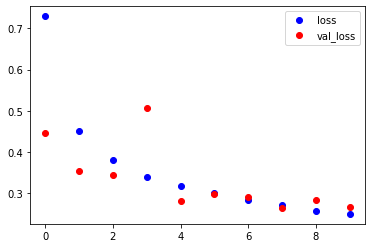

In [14]:
val_dict = hist.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0, len(loss))
plt.plot(x, loss, 'bo', label='loss')
plt.plot(x, val_loss, 'ro', label='val_loss')
plt.legend()

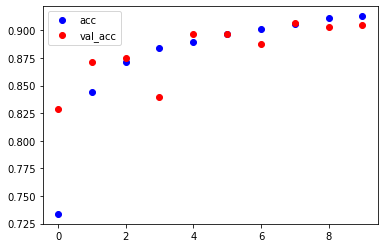

In [15]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']

x = np.arange(0, len(acc))
plt.plot(x, acc, 'bo', label='acc')
plt.plot(x, val_acc, 'ro', label='val_acc')
plt.legend()

In [16]:
test_loss, test_acc = net.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2871 - acc: 0.8999


CNN 시간은 매우 오래걸린다.CNN이 MLP에 비해 Loss도 작고 accurecy가 큰 것을 알 수 있다. 이미지 데이터 학습에는 CNN모델이 더 적합하다. 
